## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview

mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [42]:
# Checking the number of mice.

mouse_ID = mouse_study_df["Mouse ID"].unique()
len(mouse_ID)

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

ID_timepoint = mouse_study_df[["Mouse ID", "Timepoint"]]

duplicate_rows = ID_timepoint[ID_timepoint.duplicated(keep='last')]
duplicate_rows

,Mouse ID,Timepoint
860,g989,0
862,g989,5
864,g989,10
866,g989,15
868,g989,20


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 

#see above

In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_clean = mouse_study_df.loc[(mouse_study_df["Mouse ID"] != "g989"), :]
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Checking the number of mice in the clean DataFrame.

mouse_ID_clean = mouse_study_clean["Mouse ID"].unique()
len(mouse_ID_clean)

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_group = mouse_study_clean.groupby("Drug Regimen")

#calculate mean

summary_mean = summary_group["Tumor Volume (mm3)"].mean()

#calculate median

summary_median = summary_group["Tumor Volume (mm3)"].median()

#calculate variance

summary_variance = summary_group["Tumor Volume (mm3)"].var()

#calculate standard deviation

summary_deviation = summary_group["Tumor Volume (mm3)"].std()
summary_deviation

#Calculate SEM

summary_SEM = summary_group["Tumor Volume (mm3)"].sem()
summary_SEM

#Create new dataframe

summary_df = pd.DataFrame({"Mean": summary_mean,
                          "Median": summary_median,
                          "Variance": summary_variance,
                          "Standard Deviation": summary_deviation,
                          "SEM": summary_SEM})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

Text(0, 0.5, 'Number of Tests')

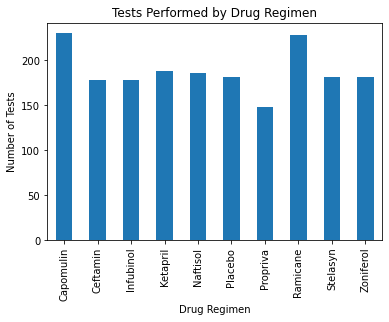

In [134]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimen_count = summary_group["Timepoint"].count()
regimen_count.plot(kind="bar", y="Number of Tests", title="Tests Performed by Drug Regimen")
plt.ylabel("Number of Tests")

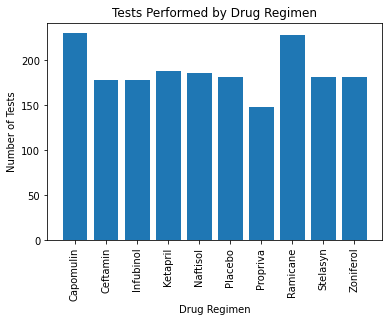

In [93]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(np.arange(0, len(regimen_count)), regimen_count, align="center", tick_label=regimen_count.keys(), )
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")
plt.title("Tests Performed by Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()



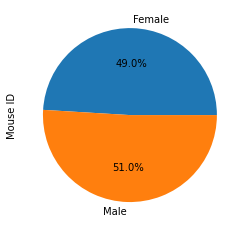

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = mouse_study_clean.groupby("Sex")
gender_count = gender_group["Mouse ID"].count()
gender_count

gender_count.plot(kind="pie", autopct='%1.1f%%')

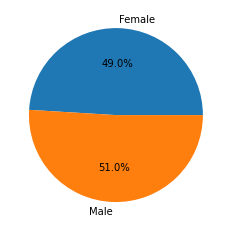

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_id_group = mouse_study_clean.groupby("Mouse ID")

mouse_timpoint = mouse_id_group["Timepoint"].max().to_frame()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_timpoint = mouse_timpoint.reset_index()
mouse_timpoint

largest_tumor_df = pd.merge(mouse_timpoint, mouse_study_clean, how="left", on=["Mouse ID", "Timepoint"])
largest_tumor_df

largest_tumor_2 = largest_tumor_df.loc[(largest_tumor_df["Drug Regimen"] == "Capomulin") | 
                        (largest_tumor_df["Drug Regimen"] == "Ramicane") | 
                        (largest_tumor_df["Drug Regimen"] == "Infubinol") | 
                        (largest_tumor_df["Drug Regimen"] == "Ceftamin")]
largest_tumor_2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [150]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

for treatment in largest_tumor_2["Drug Regimen"].unique():
    tumor_list = largest_tumor_2.loc[largest_tumor_df["Drug Regimen"] == treatment]
    tumor_volume = tumor_list["Tumor Volume (mm3)"]
    regimen_list = tumor_list["Drug Regimen"]
    tumor_regimen_df = pd.DataFrame({"Regimen": regimen_list,
                                "Tumor Volume": tumor_volume})
    print(tumor_regimen_df)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

outlier_df = tumor_regimen_df.loc[[(tumor_regimen_df["Tumor Volume"] >= upperq) | 
                                   (tumor_regimen_df["Tumor Volume"] <= lowerq)]]
outlier_df

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

       Regimen  Tumor Volume
0    Infubinol     67.973419
1    Infubinol     65.525743
11   Infubinol     57.031862
13   Infubinol     66.083066
27   Infubinol     72.226731
31   Infubinol     36.321346
41   Infubinol     60.969711
50   Infubinol     62.435404
56   Infubinol     60.918767
78   Infubinol     67.289621
97   Infubinol     66.196912
101  Infubinol     62.117279
123  Infubinol     47.010364
129  Infubinol     60.165180
141  Infubinol     55.629428
142  Infubinol     45.699331
153  Infubinol     54.656549
170  Infubinol     55.650681
197  Infubinol     46.250112
200  Infubinol     54.048608
202  Infubinol     51.542431
211  Infubinol     50.005138
216  Infubinol     58.268442
233  Infubinol     67.685569
245  Infubinol     62.754451
      Regimen  Tumor Volume
3    Ceftamin     62.999356
21   Ceftamin     45.000000
22   Ceftamin     56.057749
25   Ceftamin     55.742829
58   Ceftamin     48.722078
75   Ceftamin     47.784682
88   Ceftamin     61.849023
94   Ceftamin     68.9

ValueError: PandasArray must be 1-dimensional.

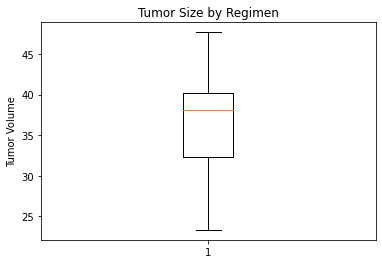

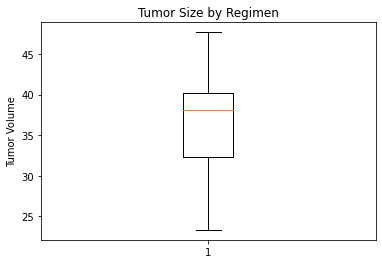

In [139]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size by Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()

fig1, ax2 = plt.subplots()
ax2.set_title('Tumor Size by Regimen')
ax2.set_ylabel('Tumor Volume')
ax2.boxplot(tumor_volume)
plt.show()


## Line and Scatter Plots

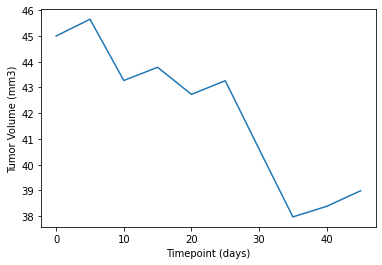

In [166]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Run for Mouse ID b128

#Create axis
x_axis = mouse_study_clean['Timepoint'].loc[mouse_study_clean['Mouse ID'] =='b128']
y_axis = mouse_study_clean['Tumor Volume (mm3)'].loc[mouse_study_clean['Mouse ID'] =='b128']

#Add labels

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#plot line chart

plt.plot(x_axis, y_axis)
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model

# for mouse weight and average tumor volume for the Capomulin regimen
